In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'
os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
import pandas as pd
df = pd.read_csv('../../codes/celeba/data/celeba/list_eval_partition.txt', delimiter=" ", 
                 names=['path', 'split'],
                 header=None, skipinitialspace=True)

df['path'] = df.apply(lambda x: "../../codes/celeba/data/celeba/img_align_celeba/{}".format(x['path']), axis=1)

df.head()

,path,split
0,../../codes/celeba/data/celeba/img_align_celeb...,0
1,../../codes/celeba/data/celeba/img_align_celeb...,0
2,../../codes/celeba/data/celeba/img_align_celeb...,0
3,../../codes/celeba/data/celeba/img_align_celeb...,0
4,../../codes/celeba/data/celeba/img_align_celeb...,0


In [3]:
df_val = df[df['split']==1]
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19867 entries, 162770 to 182636
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    19867 non-null  object
 1   split   19867 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 465.6+ KB


In [4]:
df_val.head()

,path,split
162770,../../codes/celeba/data/celeba/img_align_celeb...,1
162771,../../codes/celeba/data/celeba/img_align_celeb...,1
162772,../../codes/celeba/data/celeba/img_align_celeb...,1
162773,../../codes/celeba/data/celeba/img_align_celeb...,1
162774,../../codes/celeba/data/celeba/img_align_celeb...,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_val, _ = train_test_split(df_val, train_size=1000, random_state=42, 
                            )
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 167013 to 178565
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    1000 non-null   object
 1   split   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [7]:
df_val.head()

,path,split
167013,../../codes/celeba/data/celeba/img_align_celeb...,1
179842,../../codes/celeba/data/celeba/img_align_celeb...,1
176165,../../codes/celeba/data/celeba/img_align_celeb...,1
167714,../../codes/celeba/data/celeba/img_align_celeb...,1
180120,../../codes/celeba/data/celeba/img_align_celeb...,1


In [8]:
import pickle

for i in [5000]:
    for j in [0.5]:
        filename = os.path.join('./data/indices/{}-{}/idx-val.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_val.index.to_list(), handle)

In [9]:
df_train = df[df['split']==0]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162770 entries, 0 to 162769
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   path    162770 non-null  object
 1   split   162770 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [10]:
for path in df_val['path']:
    # print(path)
    if os.path.isfile(path):
        pass
    else:
        print(path)
        break

In [11]:
# for path in df_train['path']:
#     # print(path)
#     if os.path.isfile(path):
#         pass
#     else:
#         print(path)
#         break

In [12]:
df_train.head()

,path,split
0,../../codes/celeba/data/celeba/img_align_celeb...,0
1,../../codes/celeba/data/celeba/img_align_celeb...,0
2,../../codes/celeba/data/celeba/img_align_celeb...,0
3,../../codes/celeba/data/celeba/img_align_celeb...,0
4,../../codes/celeba/data/celeba/img_align_celeb...,0


In [13]:
df_train.tail()

,path,split
162765,../../codes/celeba/data/celeba/img_align_celeb...,0
162766,../../codes/celeba/data/celeba/img_align_celeb...,0
162767,../../codes/celeba/data/celeba/img_align_celeb...,0
162768,../../codes/celeba/data/celeba/img_align_celeb...,0
162769,../../codes/celeba/data/celeba/img_align_celeb...,0


In [14]:
for i in [5000
         ]:
    for j in [0.5]:
        if i<len(df_train):
            df_train_, _ = train_test_split(df_train, train_size=i, 
                                        random_state=42, 
                                           )
        else:
            df_train_ = df_train.copy()
            
        print(len(df_train_))
        ####
        filename = os.path.join('./data/indices/{}-{}/idx-train.pkl'.format(i, j))
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'wb') as handle:
            pickle.dump(df_train_.index.to_list(), handle)
        ####
        count = 0
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-val/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1
        print(count)
        ####
        for k in range(256):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                             )
            filename = os.path.join('./data/indices/{}-{}/lds-test/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1 
        print(count)
        ####
        for k in range(1024):
            tmp, _ = train_test_split(df_train_, train_size=j, random_state=42+count+k, 
                             )
            filename = os.path.join('./data/indices/{}-{}/retrain/sub-idx-{}.pkl'.format(i, j, k))
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            with open(filename, 'wb') as handle:
                pickle.dump(tmp.index.to_list(), handle)
            count = count+1   
        print(count)

5000
256
512
1536


In [15]:
from datasets import DatasetDict, Dataset, load_dataset, Image

In [16]:
with open('./data/indices/5000-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

5000

In [17]:
idx_train[0:5]

[48803, 28992, 118843, 86803, 153263]

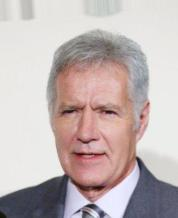

In [18]:
train_dataset = Dataset.from_dict({"img": df.loc[idx_train]['path'].tolist(),
                                  }).cast_column("img", Image())
train_dataset[0]["img"]

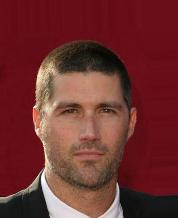

In [19]:
train_dataset[1]["img"]

In [20]:
train_dataset

Dataset({
    features: ['img'],
    num_rows: 5000
})

In [21]:
with open('./data/indices/5000-0.5/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
len(idx_val)

1000

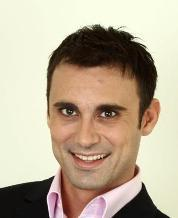

In [22]:
val_dataset = Dataset.from_dict({"img": df.loc[idx_val]['path'].tolist(),
                                  }).cast_column("img", Image())
val_dataset[0]["img"]

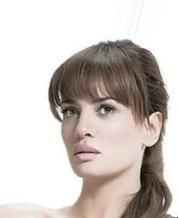

In [23]:
val_dataset[1]["img"]

In [24]:
val_dataset

Dataset({
    features: ['img'],
    num_rows: 1000
})